In [423]:
import pandas as pd
import numpy as np

df1213 = pd.read_csv(r'nhl-fun/team_201213.csv')
df1314 = pd.read_csv(r'nhl-fun/team_201314.csv')
df1415 = pd.read_csv(r'nhl-fun/team_201415.csv')
df1516 = pd.read_csv(r'nhl-fun/team_201516.csv)
df1617 = pd.read_csv(r'nhl-fun/team_201617.csv')

df1217 = [df1213,df1314,df1415,df1516,df1617]

df = pd.concat(df1217)

#Dropping rows with any null values
df = df.dropna()

#Checking for number of null rows by column
#print(df.isnull().sum(axis=0).tolist())
#Printing length of dataframe (number of rows)
#print(len(df))

df.head()

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,PDO,Year
0,Chicago Blackhawks*,26.8,48.0,36.0,7.0,5.0,77.0,0.802,155.0,102.0,...,5.0,5.0,9.1,9.8,1494.0,10.0,1258.0,0.923,101.7,2013.0
1,Pittsburgh Penguins*,29.0,48.0,36.0,12.0,0.0,72.0,0.750,165.0,119.0,...,2.0,3.0,11.5,12.0,1438.0,11.3,1403.0,0.915,102.5,2013.0
2,Anaheim Ducks*,28.8,48.0,30.0,12.0,6.0,66.0,0.688,140.0,118.0,...,5.0,5.0,10.9,9.4,1347.0,9.9,1340.0,0.914,101.5,2013.0
3,Montreal Canadiens*,27.8,48.0,29.0,14.0,5.0,63.0,0.656,149.0,126.0,...,0.0,2.0,13.0,14.6,1468.0,9.9,1293.0,0.904,100.9,2013.0
4,Boston Bruins*,27.8,48.0,28.0,14.0,6.0,62.0,0.646,131.0,109.0,...,5.0,2.0,11.9,9.5,1557.0,8.2,1373.0,0.923,100.5,2013.0


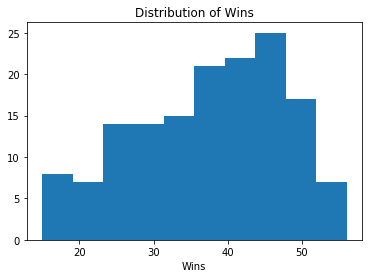

In [424]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [425]:
print(df['W'].mean(),df['W'].median(),df['W'].mode())

def assign_win_bins(W):
    if W < 20:
        return 1
    if W >=20 and W <=39:
        return 2
    if W>=40 and W<=59:
        return 3
    if W>=60:
        return 4

df['win_bins'] = df['W'].apply(assign_win_bins)

37.6 39.0 0    46.0
dtype: float64


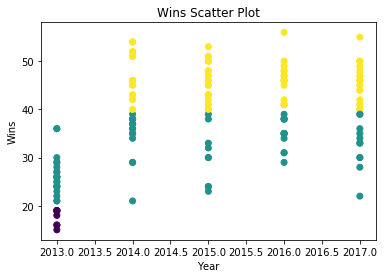

In [426]:
plt.scatter(df['Year'],df['W'],c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [427]:
#Creating dictionaries to avoid data type issues
goals_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['Year']
    goals = row['GF']
    games = row['GP']
    if year in goals_per_year:
        goals_per_year[year] = goals_per_year[year] + goals
        games_per_year[year] = games_per_year[year] + games
    else:
        goals_per_year[year] = goals
        games_per_year[year] = games

print(goals_per_year)
print(games_per_year)

{2013.0: 3919.0, 2014.0: 6751.0, 2015.0: 6719.0, 2016.0: 6672.0, 2017.0: 6803.0}
{2013.0: 1440.0, 2014.0: 2460.0, 2015.0: 2460.0, 2016.0: 2460.0, 2017.0: 2460.0}


In [428]:
#Creating goals per game per year dictionary

nhl_goals_per_game = {}

for k,v in games_per_year.items():
    year = k
    games = v
    goals = goals_per_year[year]
    nhl_goals_per_game[year] = goals/games

print(nhl_goals_per_game)

{2013.0: 2.7215277777777778, 2014.0: 2.7443089430894307, 2015.0: 2.73130081300813, 2016.0: 2.7121951219512197, 2017.0: 2.765447154471545}


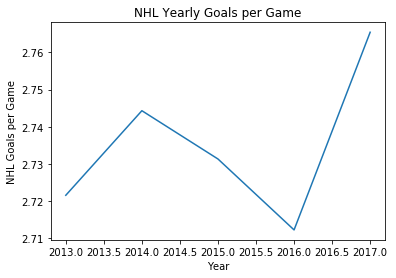

In [429]:
#Creating lists from nhl_goals_per_game dictionary

lists = sorted(nhl_goals_per_game.items())
x,y = zip(*lists)

#Plotting line plot of Year vs. NHL Goals per Game

plt.plot(x,y)
plt.title('NHL Yearly Goals per Game')
plt.xlabel('Year')
plt.ylabel('NHL Goals per Game')

plt.show()

In [430]:
#Creating year_label column to give algorithm info about how years are related

def assign_label(year):
    if year < 2013:
        return 1
    if year >= 2015 and year <= 2016:
        return 2
    if year >= 2017:
        return 3

#Add year_label to df
df['year_label'] = df['Year'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

#Concatenating df and dummy_df
df = pd.concat([df,dummy_df],axis=1)

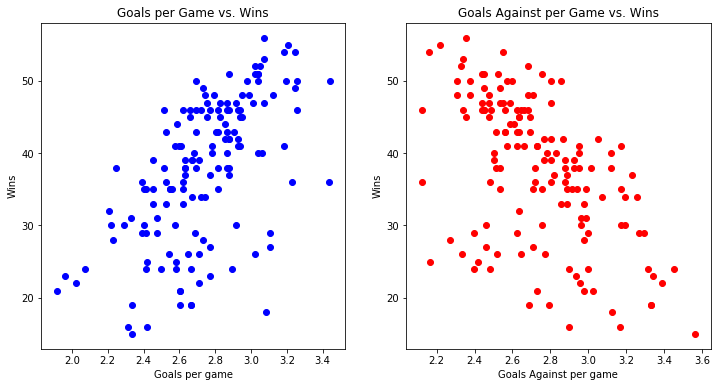

In [431]:
#Creating features for goals per game and goals against per game

df['g_per_game'] = df['GF']/df['GP']
df['ga_per_game'] = df['GA']/df['GP']

#Creating scatter plots for goals per game vs. wins and goals against per game vs wins
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['g_per_game'], df['W'], c='blue')
ax1.set_title('Goals per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Goals per game')

ax2.scatter(df['ga_per_game'], df['W'], c='red')
ax2.set_title('Goals Against per Game vs. Wins')
ax2.set_ylabel('Wins')
ax2.set_xlabel('Goals Against per game')

plt.show()

In [432]:
#Determining correlation between each variable and target variable
df.corr()['W']

AvAge          1.836814e-01
GP             6.880280e-01
W              1.000000e+00
L             -1.284781e-01
OL             1.685134e-01
PTS            9.870453e-01
PTS%           7.106146e-01
GF             8.893257e-01
GA             3.090584e-01
SOW            1.954699e-01
SOL            5.093486e-02
SRS            6.848219e-01
SOS           -3.668873e-01
TG/G           3.087839e-02
EVGF           8.808388e-01
EVGA           3.161333e-01
PP             6.840171e-01
PPO            6.385942e-01
PP%            3.289448e-01
PPA            2.367269e-01
PPOA           5.636447e-01
PK%            3.002303e-01
SH             3.470321e-01
SHA            1.673560e-01
PIM/G         -2.683257e-01
oPIM/G        -2.469378e-01
S              7.548703e-01
S%             3.681099e-01
SA             5.328150e-01
SV%            4.619405e-01
PDO            4.803986e-01
Year           4.865092e-01
win_bins       8.755497e-01
year_label     2.229610e-17
era_2.0        2.808862e-01
era_3.0        1.720

In [433]:
from sklearn.cluster import KMeans
from sklearn import metrics

#Store feature data from dataframe in separate arrays
#Combine into feature matrix before entering into algorithm
attributes = ['AvAge','GP','L','OL','PTS','PTS%','GF','GA','SOW','SOL','SRS','SOS','TG/G',
              'EVGF','EVGA','PP','PPO','PP%','PPA','PPOA','PK%','SH','SHA','PIM/G','oPIM/G',
              'S','S%','SA','SV%','PDO','Year','win_bins','era_2.0','era_3.0','g_per_game','ga_per_game']
data_attributes = df[attributes]

#Create silhouette score dictionary to get better idea of ideal number of clusters
#Fn returns mean silhouette coefficient over all samples
#Want higher silhouette score, and score decreases as more clusters added
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=1)
    l = km.fit_predict(data_attributes)
    s_s=metrics.silhouette_score(data_attributes,l)
    s_score_dict[i] = [s_s]

    print(s_score_dict)

{2: [0.82089537271071666]}
{2: [0.82089537271071666], 3: [0.46111637868232191]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [0.40680708158216616]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [0.40680708158216616], 5: [0.39783523824234718]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [0.40680708158216616], 5: [0.39783523824234718], 6: [0.40321795971804864]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [0.40680708158216616], 5: [0.39783523824234718], 6: [0.40321795971804864], 7: [0.29791907230696313]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [0.40680708158216616], 5: [0.39783523824234718], 6: [0.40321795971804864], 7: [0.29791907230696313], 8: [0.29112118385699992]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [0.40680708158216616], 5: [0.39783523824234718], 6: [0.40321795971804864], 7: [0.29791907230696313], 8: [0.29112118385699992], 9: [0.2792613318344494]}
{2: [0.82089537271071666], 3: [0.46111637868232191], 4: [

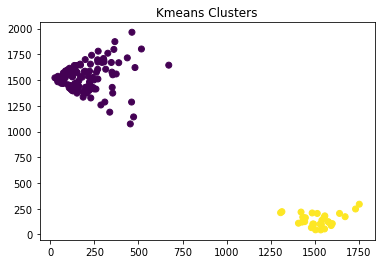

In [434]:
#Creating K-means model and determining Euclidian distances for each data point 
kmeans_model = KMeans(n_clusters=2,random_state=0)
distances = kmeans_model.fit_transform(data_attributes)

#Creating scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0],distances[:,1],c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [435]:
#Adding labels from K-means model to df and attributes list
df['labels'] = labels
attributes.append('labels')

df.head(90)

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SV%,PDO,Year,win_bins,year_label,era_2.0,era_3.0,g_per_game,ga_per_game,labels
0,Chicago Blackhawks*,26.8,48.0,36.0,7.0,5.0,77.0,0.802,155.0,102.0,...,0.923,101.7,2013.0,2,NaN,0,0,3.229167,2.125000,1
1,Pittsburgh Penguins*,29.0,48.0,36.0,12.0,0.0,72.0,0.750,165.0,119.0,...,0.915,102.5,2013.0,2,NaN,0,0,3.437500,2.479167,1
2,Anaheim Ducks*,28.8,48.0,30.0,12.0,6.0,66.0,0.688,140.0,118.0,...,0.914,101.5,2013.0,2,NaN,0,0,2.916667,2.458333,1
3,Montreal Canadiens*,27.8,48.0,29.0,14.0,5.0,63.0,0.656,149.0,126.0,...,0.904,100.9,2013.0,2,NaN,0,0,3.104167,2.625000,1
4,Boston Bruins*,27.8,48.0,28.0,14.0,6.0,62.0,0.646,131.0,109.0,...,0.923,100.5,2013.0,2,NaN,0,0,2.729167,2.270833,1
5,St. Louis Blues*,26.3,48.0,29.0,17.0,2.0,60.0,0.625,129.0,115.0,...,0.902,99.4,2013.0,2,NaN,0,0,2.687500,2.395833,1
6,Los Angeles Kings*,26.5,48.0,27.0,16.0,5.0,59.0,0.615,133.0,118.0,...,0.905,99.2,2013.0,2,NaN,0,0,2.770833,2.458333,1
7,Vancouver Canucks*,28.2,48.0,26.0,15.0,7.0,59.0,0.615,127.0,121.0,...,0.917,100.4,2013.0,2,NaN,0,0,2.645833,2.520833,1
8,Toronto Maple Leafs*,26.0,48.0,26.0,17.0,5.0,57.0,0.594,145.0,133.0,...,0.917,102.5,2013.0,2,NaN,0,0,3.020833,2.770833,1
9,Washington Capitals*,26.6,48.0,27.0,18.0,3.0,57.0,0.594,149.0,130.0,...,0.916,101.2,2013.0,2,NaN,0,0,3.104167,2.708333,1


In [436]:
#Creating new DataFrame with only variables to be included in models
numeric_cols = ['AvAge','GP','L','OL','PTS','PTS%','GF','GA','SOW','SOL','SRS','SOS','TG/G',
              'EVGF','EVGA','PP','PPO','PP%','PPA','PPOA','PK%','SH','SHA','PIM/G','oPIM/G',
              'S','S%','SA','SV%','PDO','Year','win_bins','era_2.0','era_3.0','g_per_game','ga_per_game','labels','W']
data = df[numeric_cols]
X = df[attributes]
y = df['W']


In [437]:
#Using Mean Absolute Error (MAE) to determine model accuracy
#Provides average absolute value by which prediction missed mark

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#Creating Linear Regression model, fitting, predicting
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

#Determining MAE
mae = mean_absolute_error(y_test,pred)

print(mae)

9.91020131455e-15


In [438]:
#Trying Ridge regression model
#RidgeCV allows setting alpha (complexity parameter) that controls amount of shrinkage
#uses cross-validation to determine which of alphas provided is ideal

from sklearn.linear_model import RidgeCV

#Creating Ridge Linear Regression model, fitting, making predictions
rrm = RidgeCV(alphas=(0.01,0.1,1.0,10.0),normalize=True)
rrm.fit(X_train,y_train)
pred_rrm = rrm.predict(X_test)

#Determine MAE
mae_rrm = mean_absolute_error(y_test,pred_rrm)
print(mae_rrm)

0.313177331295
